<a href="https://colab.research.google.com/github/samehaisaa/Shape-Recognition-And-Descriptor-Analysis/blob/main/Squelettisation_WaterShed_Transform%C3%A9e_en_distance_FAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_distance_transforms(image_path,seuil):
    binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(binary_image, seuil, 1, cv2.THRESH_BINARY)

    binary_image_inverted = 1 - binary_image

    distance_transform_euclidean = cv2.distanceTransform(binary_image_inverted, distanceType=cv2.DIST_L2, maskSize=3)
    distance_transform_manhattan = cv2.distanceTransform(binary_image_inverted, distanceType=cv2.DIST_L1, maskSize=3)

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(binary_image, cmap='gray')
    ax[0].set_title("Image Binaire Originale (Inversée)")
    ax[0].axis('off')

    ax[1].imshow(distance_transform_euclidean, cmap='gray')
    ax[1].set_title("Transformée de Distance Euclidienne")
    ax[1].axis('off')

    ax[2].imshow(distance_transform_manhattan, cmap='gray')
    ax[2].set_title("Transformée de Distance Manhattan")
    ax[2].axis('off')


    plt.show()



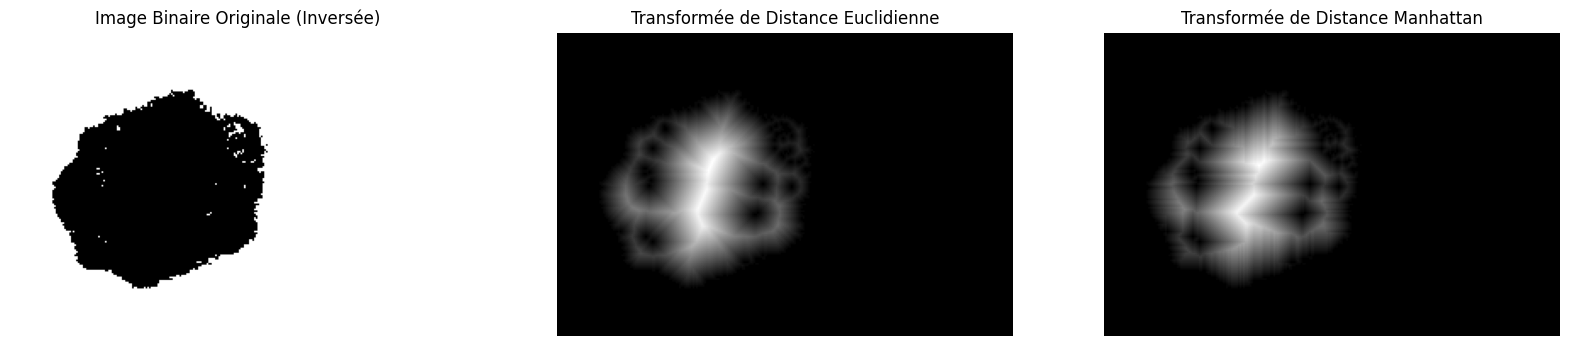

In [ ]:
seuil = 115
display_distance_transforms('/content/melanome.jpg',seuil)


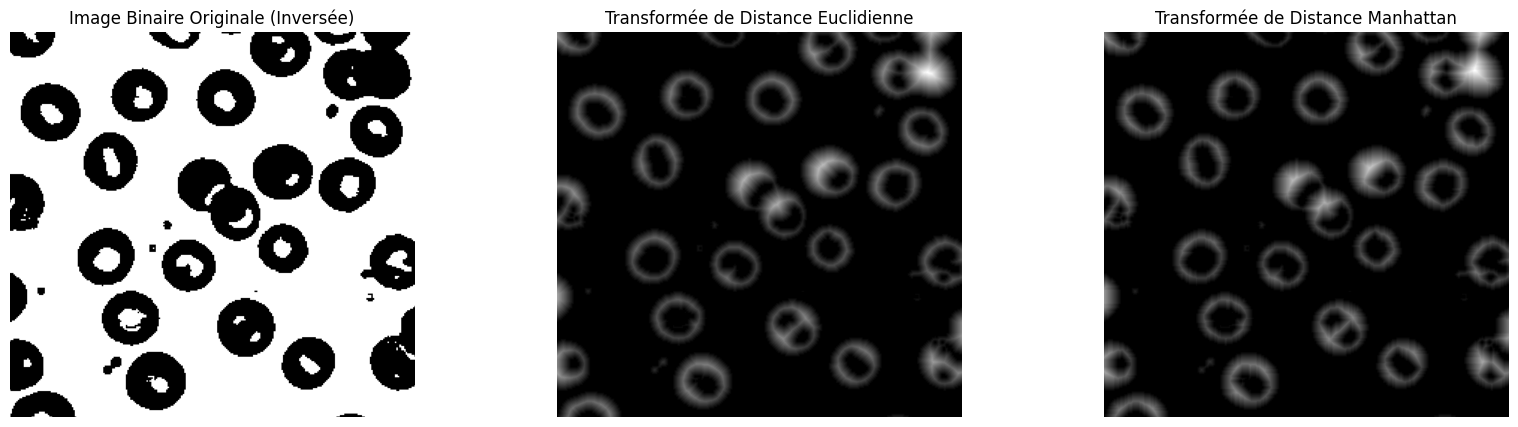

In [ ]:
display_distance_transforms('/content/blood1.png',seuil)


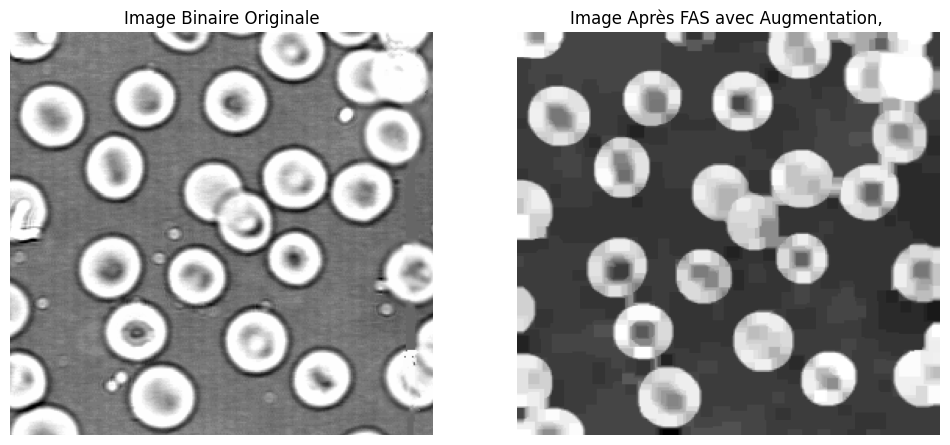

In [ ]:

def filtre_alterne_sequentiel_augmentation(image_path, initial_kernel_size, iterations):
    binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    binary_image = 1 - binary_image

    result_image = binary_image.copy()

    for i in range(iterations):
        kernel_size = initial_kernel_size + (i * 2)  # Augmenter la taille à chaque itération
        kernel = np.ones((kernel_size, kernel_size), np.uint8)

        opened_image = cv2.morphologyEx(result_image, cv2.MORPH_OPEN, kernel)
        closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)
        result_image = closed_image

    return binary_image, result_image

binary_image, filtered_image_blood = filtre_alterne_sequentiel_augmentation('/content/blood1.png', initial_kernel_size=3, iterations=10)
image_blood = cv2.imread('/content/blood1.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Image Binaire Originale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_blood, cmap='gray')
plt.title("Image Après FAS avec Augmentation, ")
plt.axis('off')

plt.show()


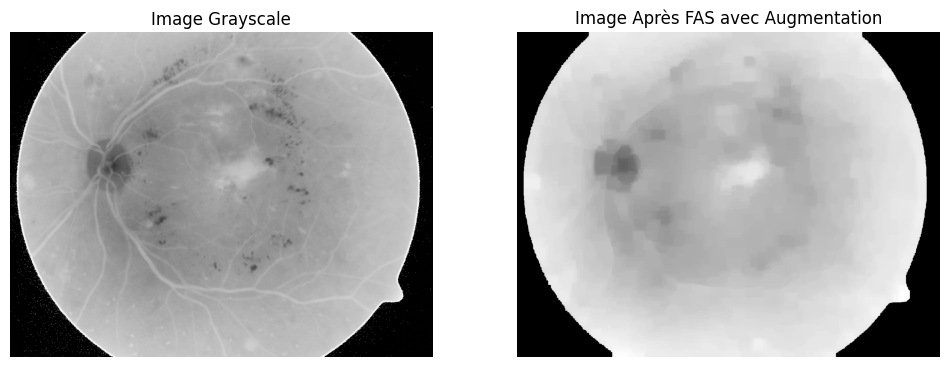

In [ ]:

def filtre_alterne_sequentiel_augmentation(image_path, initial_kernel_size, iterations):
    binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    binary_image = 1 - binary_image

    result_image = binary_image.copy()

    for i in range(iterations):
        kernel_size = initial_kernel_size + (i * 2)  # Augmenter la taille à chaque itération
        kernel = np.ones((kernel_size, kernel_size), np.uint8)

        closed_image = cv2.morphologyEx(result_image, cv2.MORPH_CLOSE, kernel)

        opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
        result_image = opened_image

    return binary_image, result_image

binary_image, filtered_image = filtre_alterne_sequentiel_augmentation('/content/0.png', initial_kernel_size=3, iterations=10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Image Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Image Après FAS avec Augmentation")
plt.axis('off')

plt.show()


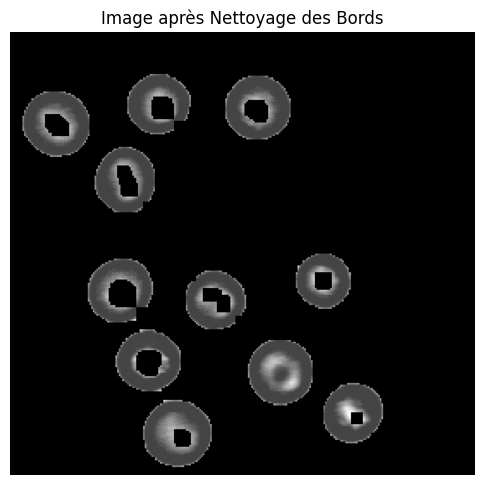

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def edge_cleaning_only(image,image_blood):
    # Convert the grayscale image to binary
    _, binary_image = cv2.threshold(image, 144, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.copy()



    cleaned_image = binary_image.copy()
    h, w = cleaned_image.shape
    contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        for point in contour:
            if point[0][0] <= 1 or point[0][1] <= 1 or point[0][0] >= w - 2 or point[0][1] >= h - 2:
                cv2.drawContours(cleaned_image, [contour], -1, 0, thickness=cv2.FILLED)
                break

    cleaned_grayscale_image = cv2.bitwise_and(image_blood, image_blood, mask=cleaned_image)

    return cleaned_grayscale_image

cleaned_image = edge_cleaning_only(filtered_image_blood,image_blood)

plt.figure(figsize=(6, 6))

plt.imshow(cleaned_image, cmap='gray')
plt.title("Image après Nettoyage des Bords")
plt.axis('off')

plt.show()


<Figure size 1200x600 with 0 Axes>

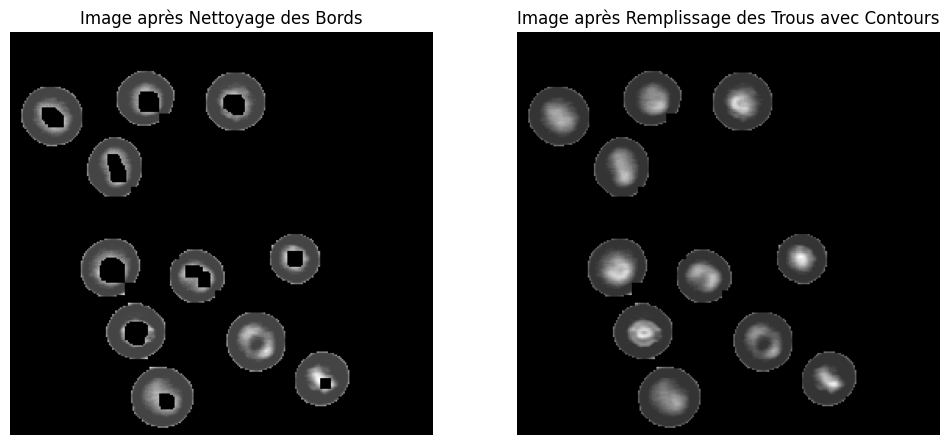

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fill_holes_using_contours(image,image_blood):
    # Ensure the input image is binary
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

    # Fill holes in the binary image
    filled_holes = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))  # Close small holes

    # Detect contours of the filled image
    contours, _ = cv2.findContours(filled_holes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to fill in the original grayscale image
    mask = np.zeros_like(image)
    plt.figure(figsize=(12, 6))


    # Draw the filled contours on the mask
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Combine the mask with the original grayscale image
    filled_image = cv2.bitwise_and(image_blood, mask)

    return filled_image

# Example usage
filled_image = fill_holes_using_contours(cleaned_image,image_blood)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cleaned_image, cmap='gray')
plt.title("Image après Nettoyage des Bords")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filled_image, cmap='gray')
plt.title("Image après Remplissage des Trous avec Contours")
plt.axis('off')

plt.show()


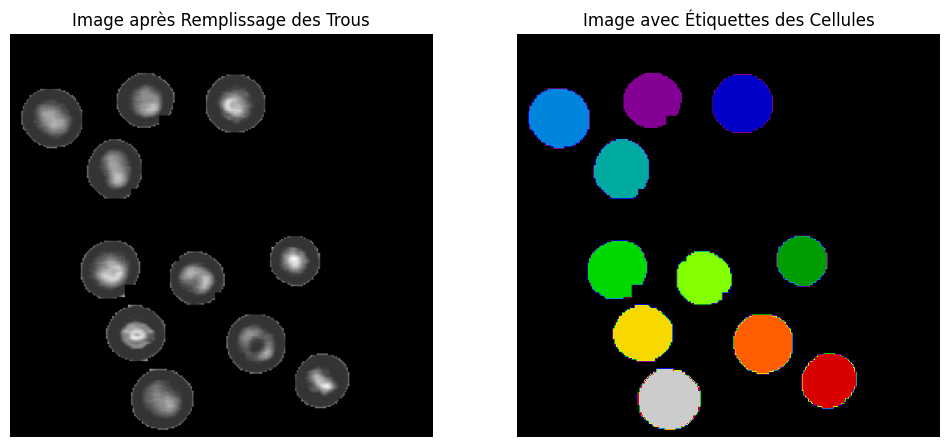

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def label_cells(image):
    _, image = cv2.threshold(image, 10, 255, cv2.THRESH_BINARY)

    labeled_image = measure.label(image, connectivity=2)  # 2-connectivity
    return labeled_image

labeled_image = label_cells(filled_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filled_image, cmap='gray')
plt.title("Image après Remplissage des Trous")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title("Image avec Étiquettes des Cellules")
plt.axis('off')

plt.show()


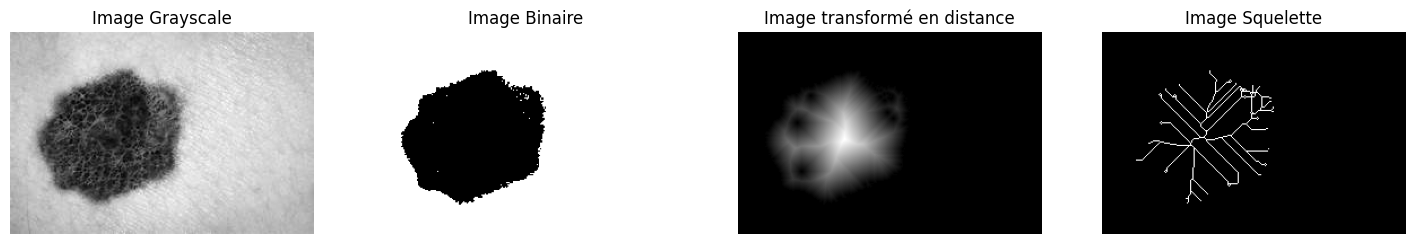

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

def apply_skeletonization(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    _, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = cv2.bitwise_not(binary_image)
    distance = cv2.distanceTransform(binary_image, distanceType=cv2.DIST_L2, maskSize=3)

    skeleton = morphology.skeletonize(distance*255)
    skeleton = (skeleton * 255).astype(np.uint8)

    return gray_image, binary_image, skeleton

melanoma_image = cv2.imread('/content/melanome.jpg')

gray_image, binary_image, skeleton = apply_skeletonization(melanoma_image)

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Image Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
binary_image = cv2.bitwise_not(binary_image)
plt.imshow(binary_image, cmap='gray')
plt.title("Image Binaire")
plt.axis('off')
_, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_image = cv2.bitwise_not(binary_image)

distance = cv2.distanceTransform(binary_image, distanceType=cv2.DIST_L2, maskSize=3)
plt.subplot(1, 4, 3)
plt.imshow(distance, cmap='gray')
plt.title("Image transformé en distance")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(skeleton, cmap='gray')
plt.title("Image Squelette")
plt.axis('off')



plt.show()


In [ ]:
image cerveaux , utiliser (ouverture gradient , etc .. segmentation basé watershed , marqueur = tumeur ( pour segmenter que la tumeur ))